In [13]:
import os
import numpy as np
import pandas as pd
import random
import hashlib
import wave
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
import matplotlib.pyplot as plt 


In [ ]:
data_path = 'C:\\Users\\SSN\\E-DAIC'
classes = os.listdir(data_path)
classes

In [ ]:
# Noise Augmentation

directory = 'C:\\Users\\SSN\\background_noise\\' 

# Get a list of all files in the directory
files = os.listdir(directory)

for c in classes:
    class_path = os.path.join(data_path, c)
    for file in os.listdir(class_path):

        file_path = os.path.join(class_path, file)

        # Load the speech and noise signals
        speech = AudioSegment.from_file(file_path, format="wav")

        # Select a random file from the list
        random_file = random.choice(files)

        noise = AudioSegment.from_file(directory + random_file, format="wav")

        # Set the duration of the noise signal to match the speech signal
        duration = len(speech)

        # Define the number of times to add the noise
        num_times = 5
        start_time = 0

        # Add the noise to the speech signal multiple times
        for i in range(num_times):

            if(duration - start_time > 0):
                # Set the start time of the noise signal
                noise_start_time = random.randint(start_time, start_time + len(noise))

                start_time = noise_start_time + len(noise)
                
                # Add the noise to the speech signal at the specified time
                speech = speech.overlay(noise, position=noise_start_time)

        # Export the resulting audio signal as a WAV file
        speech.export(class_path + "\\A_" + file, format="wav")

In [ ]:
# Splitting audio file into multiple files of variable length

from pydub import AudioSegment

X = []
y = []
j=1
level_path = ["C:\\Users\\SSN\\E-DAIC1\\Phase2\\Nonstress\\No", 
              "C:\\Users\\SSN\\E-DAIC1\\Phase2\\Nonstress\\Mild",
              "C:\\Users\\SSN\\E-DAIC1\\Phase2\\Stress\\Moderate",
              "C:\\Users\\SSN\\E-DAIC1\\Phase2\\Stress\\Severe",
              "C:\\Users\\SSN\\E-DAIC1\\Phase2\\Stress\\Extreme"]

s_level_path = ["C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Nonstress\\No", 
              "C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Nonstress\\Mild",
              "C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Stress\\Moderate",
              "C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Stress\\Severe",
              "C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Stress\\Extreme"]

for level in range(len(level_path)):
    for file in os.listdir(level_path[level]):

        file_path = os.path.join(level_path[level], file)

        # Load audio file
        audio = AudioSegment.from_file(file_path, format="wav")

        print(file_path)

        # Define length of each segment in milliseconds
        segment_length = 50000  # 50 seconds

        # Split audio into segments using sliding window approach
        segments = []
        for i in range(60000, len(audio)-60000, segment_length):
            segment = audio[i:i+segment_length]
            segment_length += 20000
            segments.append(segment)

        # Save each segment as a separate audio file
        for i, segment in enumerate(segments):
            segment.export(os.path.join(s_level_path[level],f"{file.rsplit('.',1)[0]}_{i}.wav"), format="wav")
            print(os.path.join(s_level_path[level],f"{file.rsplit('.',1)[0]}_{i}.wav"))
        print(j)
        j+=1

In [ ]:
# Splitted the data into 5 levels (No, Mild, Moderate, Severe, Extreme)
import re
import shutil

for path, directories, files in os.walk('C:\\Users\\SSN\\E-DAIC1\\RFMS83'):
    for audio in files:
        if audio == "train_split.csv":
            train_df = pd.read_csv(os.path.join(path,audio), index_col=None)
            train_df = train_df[['Participant_ID','PHQ_Binary', 'Level']]

        if audio == "dev_split.csv":
            dev_df = pd.read_csv(os.path.join(path,audio))
            dev_df = dev_df[['Participant_ID','PHQ_Binary', 'Level']]

        if audio == "test_split.csv":
            test_df = pd.read_csv(os.path.join(path,audio))
            test_df = test_df[['Participant_ID','PHQ_Binary', 'Level']]

print(train_df.to_string(), "\n\n\n", dev_df, "\n\n\n", test_df)

no_path = "C:\\Users\\SSN\\E-DAIC1\\Phase2\\Nonstress\\No"
mild_path = "C:\\Users\\SSN\\E-DAIC1\\Phase2\\Nonstress\\Mild"
moderate_path = "C:\\Users\\SSN\\E-DAIC1\\Phase2\\Stress\\Moderate"
severe_path = "C:\\Users\\SSN\\E-DAIC1\\Phase2\\Stress\\Severe"
extreme_path = "C:\\Users\\SSN\\E-DAIC1\\Phase2\\Stress\\Extreme"

train_list = list(train_df['Participant_ID'])
train_label = list(train_df['Level'])
dev_list = list(dev_df['Participant_ID'])
dev_label = list(dev_df['Level'])
test_list = list(test_df['Participant_ID'])
test_label = list(test_df['Level'])

print(train_list,test_list,dev_list,sep="\n")
print(train_label, test_label, dev_label,sep="\n")

for path, directories, files in os.walk('C:\\Users\\SSN\\E-DAIC1\\RFMS83'):

    for audio in files:
        if audio.endswith(".wav"):
            aud_num = int(re.findall('\d+', audio)[0])
            if aud_num in train_list:
                label = train_label[train_list.index(aud_num)]
            
            if aud_num in test_list:
                label = test_label[test_list.index(aud_num)]

            if aud_num in dev_list:
                label = dev_label[dev_list.index(aud_num)]
                
            if label == "No":
                # print(os.path.join(path,audio), no_path)
                shutil.copy(os.path.join(path,audio), no_path) 
            elif label == "Mild":
                shutil.copy(os.path.join(path,audio), mild_path) 
            elif label == "Moderate":
                shutil.copy(os.path.join(path,audio), moderate_path)
            elif label == "Extreme":
                shutil.copy(os.path.join(path,audio), extreme_path)  
            else:
                shutil.copy(os.path.join(path,audio), severe_path) 


In [8]:
# Remove duplicate audio files from a "No" directory.

def get_file_hash(file_path):
    """Return the SHA-256 hash of a file."""
    with open(file_path, 'rb') as f:
        data = f.read()
    return hashlib.sha256(data).hexdigest()

def remove_duplicate_audio_files(directory):
    # cnt = 0
    """Remove duplicate audio files from a directory."""
    # Create a dictionary to store file hashes
    hashes = {}
    # Loop over all files in the directory
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        # Check if the file is an audio file
        if os.path.isfile(filepath) and filename.lower().endswith('.wav'):
            # Get the hash of the file
            file_hash = get_file_hash(filepath)
            # If the hash is already in the dictionary, delete the file
            if file_hash in hashes:
                print(f"Removing duplicate file: {filename}")
                os.remove(filepath)
                # cnt +=1
            # Otherwise, add the hash to the dictionary
            else:
                hashes[file_hash] = filename
    # print(cnt)

# Example usage:
remove_duplicate_audio_files("C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Nonstress\\No")

Removing duplicate file: Nonstress.301_AUDIO_13.wav
Removing duplicate file: Nonstress.301_AUDIO_14.wav
Removing duplicate file: Nonstress.303_AUDIO_10.wav
Removing duplicate file: Nonstress.303_AUDIO_11.wav
Removing duplicate file: Nonstress.303_AUDIO_12.wav
Removing duplicate file: Nonstress.303_AUDIO_13.wav
Removing duplicate file: Nonstress.303_AUDIO_14.wav
Removing duplicate file: Nonstress.303_AUDIO_15.wav
Removing duplicate file: Nonstress.303_AUDIO_16.wav
Removing duplicate file: Nonstress.303_AUDIO_17.wav
Removing duplicate file: Nonstress.303_AUDIO_7.wav
Removing duplicate file: Nonstress.303_AUDIO_8.wav
Removing duplicate file: Nonstress.303_AUDIO_9.wav
Removing duplicate file: Nonstress.307_AUDIO_15.wav
Removing duplicate file: Nonstress.307_AUDIO_16.wav
Removing duplicate file: Nonstress.307_AUDIO_17.wav
Removing duplicate file: Nonstress.307_AUDIO_18.wav
Removing duplicate file: Nonstress.307_AUDIO_19.wav
Removing duplicate file: Nonstress.307_AUDIO_20.wav
Removing duplic

In [9]:
# Remove duplicate audio files from a "Mild" directory.

def get_file_hash(file_path):
    """Return the SHA-256 hash of a file."""
    with open(file_path, 'rb') as f:
        data = f.read()
    return hashlib.sha256(data).hexdigest()

def remove_duplicate_audio_files(directory):
    # cnt = 0
    """Remove duplicate audio files from a directory."""
    # Create a dictionary to store file hashes
    hashes = {}
    # Loop over all files in the directory
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        # Check if the file is an audio file
        if os.path.isfile(filepath) and filename.lower().endswith('.wav'):
            # Get the hash of the file
            file_hash = get_file_hash(filepath)
            # If the hash is already in the dictionary, delete the file
            if file_hash in hashes:
                print(f"Removing duplicate file: {filename}")
                os.remove(filepath)
                # cnt +=1
            # Otherwise, add the hash to the dictionary
            else:
                hashes[file_hash] = filename
    # print(cnt)

# Example usage:
remove_duplicate_audio_files("C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Nonstress\\Mild")

Removing duplicate file: Nonstress.305_AUDIO_30.wav
Removing duplicate file: Nonstress.305_AUDIO_31.wav
Removing duplicate file: Nonstress.320_AUDIO_13.wav
Removing duplicate file: Nonstress.320_AUDIO_14.wav
Removing duplicate file: Nonstress.331_AUDIO_0.wav
Removing duplicate file: Nonstress.333_AUDIO_10.wav
Removing duplicate file: Nonstress.333_AUDIO_11.wav
Removing duplicate file: Nonstress.333_AUDIO_12.wav
Removing duplicate file: Nonstress.333_AUDIO_13.wav
Removing duplicate file: Nonstress.333_AUDIO_14.wav
Removing duplicate file: Nonstress.333_AUDIO_15.wav
Removing duplicate file: Nonstress.333_AUDIO_16.wav
Removing duplicate file: Nonstress.333_AUDIO_9.wav
Removing duplicate file: Nonstress.334_AUDIO_16.wav
Removing duplicate file: Nonstress.334_AUDIO_17.wav
Removing duplicate file: Nonstress.335_AUDIO_10.wav
Removing duplicate file: Nonstress.335_AUDIO_11.wav
Removing duplicate file: Nonstress.335_AUDIO_12.wav
Removing duplicate file: Nonstress.335_AUDIO_13.wav
Removing dupli

In [11]:
# Remove duplicate audio files from a "Moderate" directory.

def get_file_hash(file_path):
    """Return the SHA-256 hash of a file."""
    with open(file_path, 'rb') as f:
        data = f.read()
    return hashlib.sha256(data).hexdigest()

def remove_duplicate_audio_files(directory):
    # cnt = 0
    """Remove duplicate audio files from a directory."""
    # Create a dictionary to store file hashes
    hashes = {}
    # Loop over all files in the directory
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        # Check if the file is an audio file
        if os.path.isfile(filepath) and filename.lower().endswith('.wav'):
            # Get the hash of the file
            file_hash = get_file_hash(filepath)
            # If the hash is already in the dictionary, delete the file
            if file_hash in hashes:
                print(f"Removing duplicate file: {filename}")
                os.remove(filepath)
                # cnt +=1
            # Otherwise, add the hash to the dictionary
            else:
                hashes[file_hash] = filename
    # print(cnt)

# Example usage:
remove_duplicate_audio_files("C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Stress\\Moderate")

Removing duplicate file: Stress.330_AUDIO_13.wav
Removing duplicate file: Stress.337_AUDIO_13.wav
Removing duplicate file: Stress.337_AUDIO_14.wav
Removing duplicate file: Stress.337_AUDIO_15.wav
Removing duplicate file: Stress.337_AUDIO_16.wav
Removing duplicate file: Stress.337_AUDIO_17.wav
Removing duplicate file: Stress.337_AUDIO_18.wav
Removing duplicate file: Stress.337_AUDIO_19.wav
Removing duplicate file: Stress.337_AUDIO_20.wav
Removing duplicate file: Stress.337_AUDIO_21.wav
Removing duplicate file: Stress.337_AUDIO_22.wav
Removing duplicate file: Stress.337_AUDIO_23.wav
Removing duplicate file: Stress.337_AUDIO_24.wav
Removing duplicate file: Stress.337_AUDIO_25.wav
Removing duplicate file: Stress.337_AUDIO_26.wav
Removing duplicate file: Stress.337_AUDIO_27.wav
Removing duplicate file: Stress.337_AUDIO_28.wav
Removing duplicate file: Stress.337_AUDIO_29.wav
Removing duplicate file: Stress.337_AUDIO_30.wav
Removing duplicate file: Stress.337_AUDIO_31.wav
Removing duplicate f

In [12]:
# Remove duplicate audio files from a "Severe" directory.

def get_file_hash(file_path):
    """Return the SHA-256 hash of a file."""
    with open(file_path, 'rb') as f:
        data = f.read()
    return hashlib.sha256(data).hexdigest()

def remove_duplicate_audio_files(directory):
    # cnt = 0
    """Remove duplicate audio files from a directory."""
    # Create a dictionary to store file hashes
    hashes = {}
    # Loop over all files in the directory
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        # Check if the file is an audio file
        if os.path.isfile(filepath) and filename.lower().endswith('.wav'):
            # Get the hash of the file
            file_hash = get_file_hash(filepath)
            # If the hash is already in the dictionary, delete the file
            if file_hash in hashes:
                print(f"Removing duplicate file: {filename}")
                os.remove(filepath)
                # cnt +=1
            # Otherwise, add the hash to the dictionary
            else:
                hashes[file_hash] = filename
    # print(cnt)

# Example usage:
remove_duplicate_audio_files("C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Stress\\Severe")

Removing duplicate file: Stress.332_AUDIO_10.wav
Removing duplicate file: Stress.332_AUDIO_11.wav
Removing duplicate file: Stress.332_AUDIO_12.wav
Removing duplicate file: Stress.332_AUDIO_13.wav
Removing duplicate file: Stress.332_AUDIO_14.wav
Removing duplicate file: Stress.332_AUDIO_15.wav
Removing duplicate file: Stress.332_AUDIO_7.wav
Removing duplicate file: Stress.332_AUDIO_8.wav
Removing duplicate file: Stress.332_AUDIO_9.wav
Removing duplicate file: Stress.345_AUDIO_10.wav
Removing duplicate file: Stress.345_AUDIO_11.wav
Removing duplicate file: Stress.345_AUDIO_12.wav
Removing duplicate file: Stress.345_AUDIO_13.wav
Removing duplicate file: Stress.345_AUDIO_8.wav
Removing duplicate file: Stress.345_AUDIO_9.wav
Removing duplicate file: Stress.354_AUDIO_0.wav
Removing duplicate file: Stress.367_AUDIO_17.wav
Removing duplicate file: Stress.367_AUDIO_18.wav
Removing duplicate file: Stress.367_AUDIO_19.wav
Removing duplicate file: Stress.367_AUDIO_20.wav
Removing duplicate file: S

In [13]:
# Remove duplicate audio files from a "Extreme" directory.

def get_file_hash(file_path):
    """Return the SHA-256 hash of a file."""
    with open(file_path, 'rb') as f:
        data = f.read()
    return hashlib.sha256(data).hexdigest()

def remove_duplicate_audio_files(directory):
    # cnt = 0
    """Remove duplicate audio files from a directory."""
    # Create a dictionary to store file hashes
    hashes = {}
    # Loop over all files in the directory
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        # Check if the file is an audio file
        if os.path.isfile(filepath) and filename.lower().endswith('.wav'):
            # Get the hash of the file
            file_hash = get_file_hash(filepath)
            # If the hash is already in the dictionary, delete the file
            if file_hash in hashes:
                print(f"Removing duplicate file: {filename}")
                os.remove(filepath)
                # cnt +=1
            # Otherwise, add the hash to the dictionary
            else:
                hashes[file_hash] = filename
    # print(cnt)

# Example usage:
remove_duplicate_audio_files("C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Stress\\Extreme")

Removing duplicate file: Stress.308_AUDIO_11.wav
Removing duplicate file: Stress.308_AUDIO_12.wav
Removing duplicate file: Stress.308_AUDIO_13.wav
Removing duplicate file: Stress.308_AUDIO_14.wav
Removing duplicate file: Stress.311_AUDIO_0.wav
Removing duplicate file: Stress.311_AUDIO_13.wav
Removing duplicate file: Stress.321_AUDIO_10.wav
Removing duplicate file: Stress.321_AUDIO_11.wav
Removing duplicate file: Stress.321_AUDIO_12.wav
Removing duplicate file: Stress.321_AUDIO_13.wav
Removing duplicate file: Stress.321_AUDIO_14.wav
Removing duplicate file: Stress.321_AUDIO_7.wav
Removing duplicate file: Stress.321_AUDIO_8.wav
Removing duplicate file: Stress.321_AUDIO_9.wav
Removing duplicate file: Stress.346_AUDIO_0.wav
Removing duplicate file: Stress.346_AUDIO_22.wav
Removing duplicate file: Stress.348_AUDIO_10.wav
Removing duplicate file: Stress.348_AUDIO_11.wav
Removing duplicate file: Stress.348_AUDIO_7.wav
Removing duplicate file: Stress.348_AUDIO_8.wav
Removing duplicate file: St

In [9]:
# Checking whether any duplicate file is present in dataset.

def get_file_hash(file_path):
    """Return the SHA-256 hash of a file."""
    with open(file_path, 'rb') as f:
        data = f.read()
    return hashlib.sha256(data).hexdigest()

def remove_duplicate_audio_files(directory):
    cnt = 0
    """Remove duplicate audio files from a directory."""
    # Create a dictionary to store file hashes
    hashes = {}
    # Loop over all files in the directory
    for dir, _, filenames in os.walk(directory):
        for filename in filenames:
            
            if not filename.lower().endswith('.wav'):
                continue

            filepath = os.path.join(dir, filename)

            # Check if the file is an audio file
            if os.path.isfile(filepath):
                # Get the hash of the file
                file_hash = get_file_hash(filepath)
                # If the hash is already in the dictionary, delete the file
                if file_hash in hashes:
                    # print(f"Removing duplicate file: {filename}")
                    # os.remove(filepath)
                    cnt +=1
                # Otherwise, add the hash to the dictionary
                else:
                    hashes[file_hash] = filename
    print(cnt)

# Example usage:
remove_duplicate_audio_files("C:\\Users\\SSN\\E-DAIC1")

0


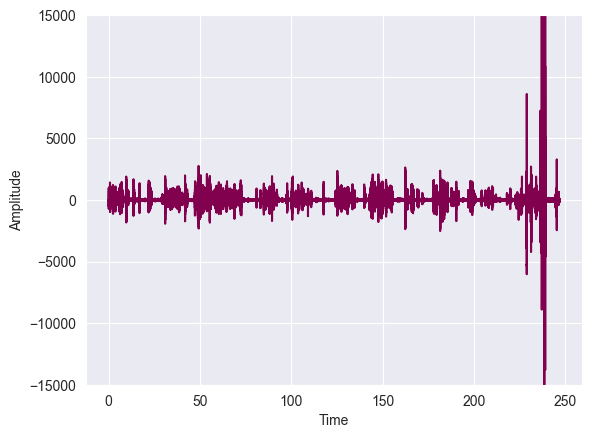

In [61]:
# Load the WAV file
with wave.open("C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Stress\\Extreme\\Stress.426_AUDIO_11.wav", 'rb') as wav_file:
    # Get the frame rate and number of frames
    frame_rate = wav_file.getframerate()
    num_frames = wav_file.getnframes()
    
    # Read the frames as a byte string and convert it to a numpy array
    frames = wav_file.readframes(num_frames)
    frames_np = np.frombuffer(frames, dtype=np.int16)

# Calculate the time axis
time = np.arange(num_frames) / frame_rate

# Plot the waveform
# plt.grid(False)
plt.plot(time, frames_np, color='#82014f')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.ylim(-15000, 15000)  # set the y-axis limits
plt.show()

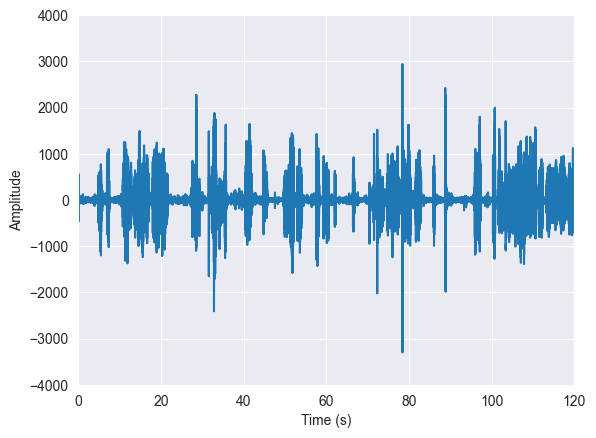

In [12]:
# Mild Stress

# Load the WAV file
with wave.open("C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Nonstress\\Mild\\Nonstress.324_AUDIO_7.wav", 'rb') as wav_file:
    # Get the frame rate and number of frames
    frame_rate = wav_file.getframerate()
    num_frames = wav_file.getnframes()
    
    # Read the frames as a byte string and convert it to a numpy array
    frames = wav_file.readframes(num_frames)
    frames_np = np.frombuffer(frames, dtype=np.int16)

# Calculate the time axis
time = np.arange(num_frames) / frame_rate

# Plot the waveform
plt.plot(time, frames_np)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 120)  # set the x-axis limits
plt.ylim(-4000, 4000)  # set the y-axis limits
plt.show()

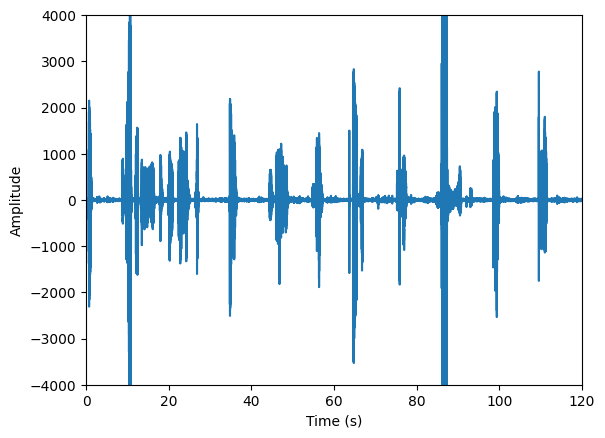

In [9]:
# Moderate Stress

# Load the WAV file
with wave.open("C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Stress\\Moderate\\Stress.330_AUDIO_9.wav", 'rb') as wav_file:
    # Get the frame rate and number of frames
    frame_rate = wav_file.getframerate()
    num_frames = wav_file.getnframes()
    
    # Read the frames as a byte string and convert it to a numpy array
    frames = wav_file.readframes(num_frames)
    frames_np = np.frombuffer(frames, dtype=np.int16)

# Calculate the time axis
time = np.arange(num_frames) / frame_rate

# Plot the waveform
plt.plot(time, frames_np)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 120)  # set the x-axis limits
plt.ylim(-4000, 4000)  # set the y-axis limits
plt.show()

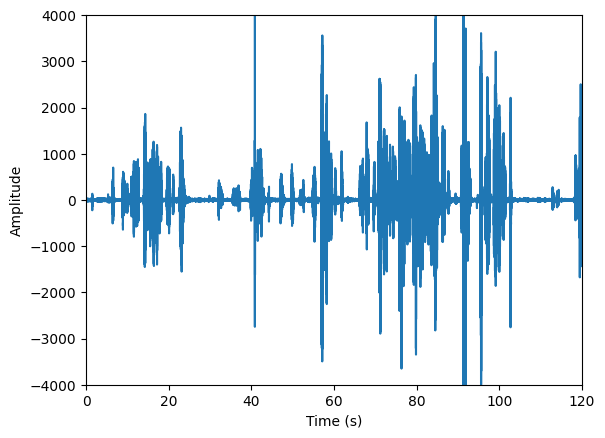

In [10]:
# Severe Stress

# Load the WAV file
with wave.open("C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Stress\\Severe\\Stress.332_AUDIO_4.wav", 'rb') as wav_file:
    # Get the frame rate and number of frames
    frame_rate = wav_file.getframerate()
    num_frames = wav_file.getnframes()
    
    # Read the frames as a byte string and convert it to a numpy array
    frames = wav_file.readframes(num_frames)
    frames_np = np.frombuffer(frames, dtype=np.int16)

# Calculate the time axis
time = np.arange(num_frames) / frame_rate

# Plot the waveform
plt.plot(time, frames_np)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 120)  # set the x-axis limits
plt.ylim(-4000, 4000)  # set the y-axis limits
plt.show()

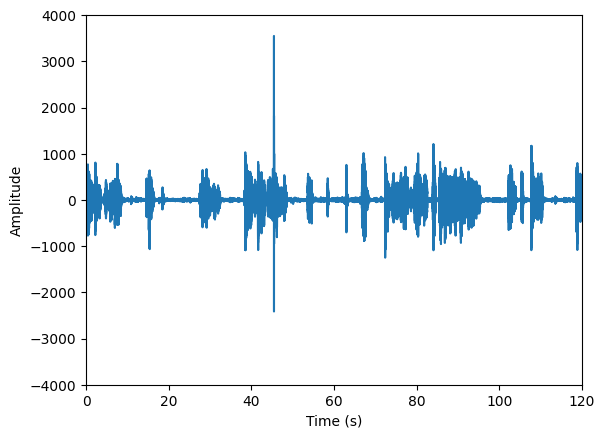

In [12]:
# Extreme Stress

# Load the WAV file
with wave.open("C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Stress\\Extreme\\Stress.321_AUDIO_5.wav", 'rb') as wav_file:
    # Get the frame rate and number of frames
    frame_rate = wav_file.getframerate()
    num_frames = wav_file.getnframes()
    
    # Read the frames as a byte string and convert it to a numpy array
    frames = wav_file.readframes(num_frames)
    frames_np = np.frombuffer(frames, dtype=np.int16)

# Calculate the time axis
time = np.arange(num_frames) / frame_rate

# Plot the waveform
plt.plot(time, frames_np)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 120)  # set the x-axis limits
plt.ylim(-4000, 4000)  # set the y-axis limits
plt.show()